In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [74]:
df_cov=pd.read_csv('covid.csv',parse_dates=['Date'])
df_cov=pd.DataFrame(df_cov)
df_cov.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


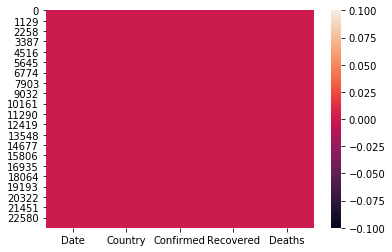

In [75]:
#checking for any missing data
sns.heatmap(df_cov.isnull())

In [76]:
df_cov.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [77]:
## format datetime column
df_cov["Date"] = pd.to_datetime(df_cov['Date'], format='%Y.%m.%d')
## create time series
ts = df_cov.groupby("Date")["Deaths"].sum().rename("No of deaths")
ts.head()

Date
2020-01-22    17
2020-01-23    18
2020-01-24    26
2020-01-25    42
2020-01-26    56
Name: No of deaths, dtype: int64

In [78]:
df_cov["Date"] = pd.to_datetime(df_cov['Date'], format='%Y.%m.%d')
ts1 = df_cov.groupby("Date")["Confirmed"].sum().rename("No of confirmed cases")
ts1.head()

Date
2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
Name: No of confirmed cases, dtype: int64

In [79]:
df_cov["Date"] = pd.to_datetime(df_cov['Date'], format='%Y.%m.%d')
ts2 = df_cov.groupby("Date")["Recovered"].sum().rename("No of recovered cases")
ts2.head()

Date
2020-01-22    28
2020-01-23    30
2020-01-24    36
2020-01-25    39
2020-01-26    52
Name: No of recovered cases, dtype: int64

In [80]:
df_covid=pd.concat([ts,ts1,ts2],axis=1)

In [81]:
df_covid= df_covid.reset_index()
df_covid.head()

,Date,No of deaths,No of confirmed cases,No of recovered cases
0,2020-01-22,17,555,28
1,2020-01-23,18,654,30
2,2020-01-24,26,941,36
3,2020-01-25,42,1434,39
4,2020-01-26,56,2118,52


In [82]:
df_cov_dates=pd.DataFrame()

In [83]:
df_cov_dates['month']=df_covid['Date'].dt.month_name()
df_cov_dates['year']=df_covid['Date'].dt.year
df_cov_dates['day']=df_covid['Date'].dt.day_name()
df_cov_dates['No of deaths']=df_covid['No of deaths']
df_cov_dates['No of confirmed cases']=df_covid['No of confirmed cases']
df_cov_dates['No of recovered cases']=df_covid['No of recovered cases']

In [84]:
df_cov_dates['Type_of_day']=np.where((df_cov_dates['day']=='Sunday')|(df_cov_dates['day']=="Saturday"),'weekend','weekday')
df_cov_dates

,month,year,day,No of deaths,No of confirmed cases,No of recovered cases,Type_of_day
0,January,2020,Wednesday,17,555,28,weekday
1,January,2020,Thursday,18,654,30,weekday
2,January,2020,Friday,26,941,36,weekday
3,January,2020,Saturday,42,1434,39,weekend
4,January,2020,Sunday,56,2118,52,weekend
...,...,...,...,...,...,...,...
121,May,2020,Friday,338160,5210817,2056643,weekday
122,May,2020,Saturday,342097,5310362,2112185,weekend
123,May,2020,Sunday,345059,5407613,2168563,weekend
124,May,2020,Monday,346232,5495061,2231738,weekday


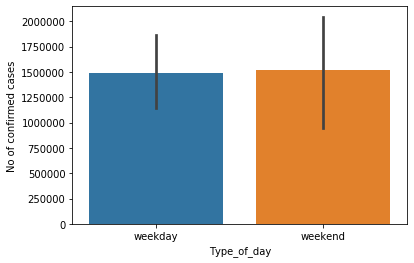

In [85]:
sns.barplot(x='Type_of_day',y='No of confirmed cases',data=df_cov_dates)
plt.show()
#high number of cases on Sunday and Saturday

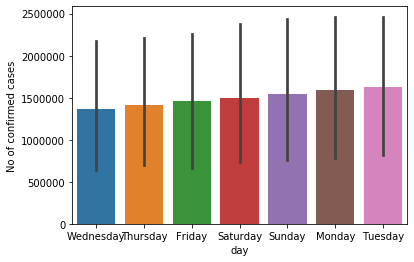

In [86]:
sns.barplot(x='day',y='No of confirmed cases',data=df_cov_dates)
plt.show()

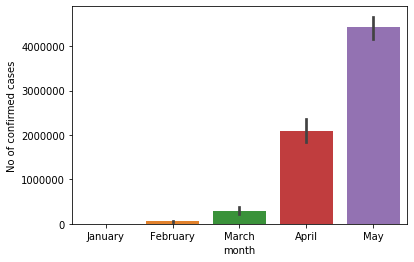

In [87]:
sns.barplot(x='month',y='No of confirmed cases',data=df_cov_dates)
plt.show()

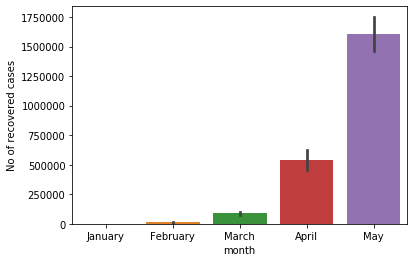

In [88]:
sns.barplot(x='month',y='No of recovered cases',data=df_cov_dates)
plt.show()

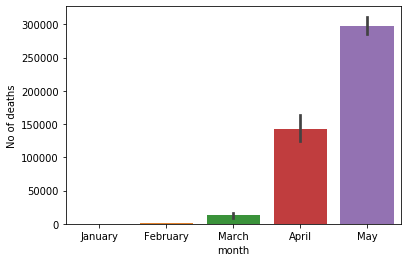

In [89]:
sns.barplot(x='month',y='No of deaths',data=df_cov_dates)
plt.show()

In [90]:
coun1 = df_cov.groupby("Country")["Deaths"].sum().rename("No of deaths")
coun1.head()

Country
Afghanistan     4669
Albania         1629
Algeria        23232
Andorra         2219
Angola           131
Name: No of deaths, dtype: int64

In [91]:
coun2 = df_cov.groupby("Country")["Confirmed"].sum().rename("No of confirmed cases")
coun2.head()

Country
Afghanistan    185236
Albania         41253
Algeria        240070
Andorra         41573
Angola           1892
Name: No of confirmed cases, dtype: int64

In [92]:
coun3 = df_cov.groupby("Country")["Recovered"].sum().rename("No of recovered")
coun3.head()

Country
Afghanistan     20845
Albania         25688
Algeria        107345
Andorra         20751
Angola            506
Name: No of recovered, dtype: int64

In [93]:
df_covid=pd.concat([coun1,coun2,coun3],axis=1)
df_covid.head()

,No of deaths,No of confirmed cases,No of recovered
Country,,,
Afghanistan,4669,185236,20845
Albania,1629,41253,25688
Algeria,23232,240070,107345
Andorra,2219,41573,20751
Angola,131,1892,506


In [94]:
df_covid_new= df_covid.reset_index()
df_covid_new.head()

,Country,No of deaths,No of confirmed cases,No of recovered
0,Afghanistan,4669,185236,20845
1,Albania,1629,41253,25688
2,Algeria,23232,240070,107345
3,Andorra,2219,41573,20751
4,Angola,131,1892,506


In [95]:
df_covid_new.dtypes

Country                  object
No of deaths              int64
No of confirmed cases     int64
No of recovered           int64
dtype: object

In [96]:
df_covid_new.corr()

,No of deaths,No of confirmed cases,No of recovered
No of deaths,1.000000,0.926449,0.759967
No of confirmed cases,0.926449,1.000000,0.801388
No of recovered,0.759967,0.801388,1.000000


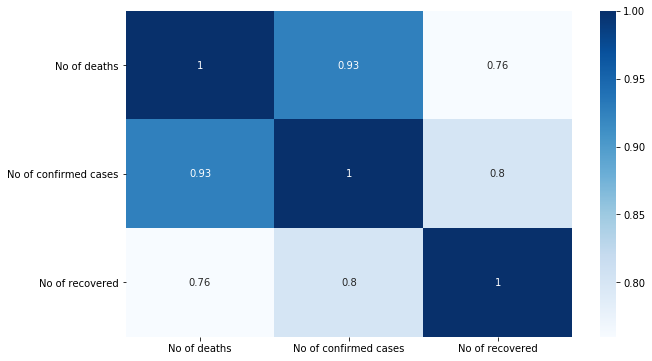

In [97]:
#showing the correlation using a heatmap from seaborn library
plt.figure(figsize=(10,6))
sns.heatmap(df_covid_new.corr(),cmap="Blues",annot=True)

In [98]:
df_covid_new.skew()

No of deaths              7.399787
No of confirmed cases    10.303690
No of recovered           5.019751
dtype: float64

In [99]:
#removing skewness using log transform
for col in df_covid.columns:
    if df_covid_new.skew().loc[col]>0.55:
        df_covid_new[col]=np.log1p(df_covid_new[col])

In [100]:
df_covid_new.skew()

No of deaths            -0.269197
No of confirmed cases    0.019723
No of recovered         -0.233565
dtype: float64

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_covid_new["Country"] = le.fit_transform(df_covid_new["Country"])

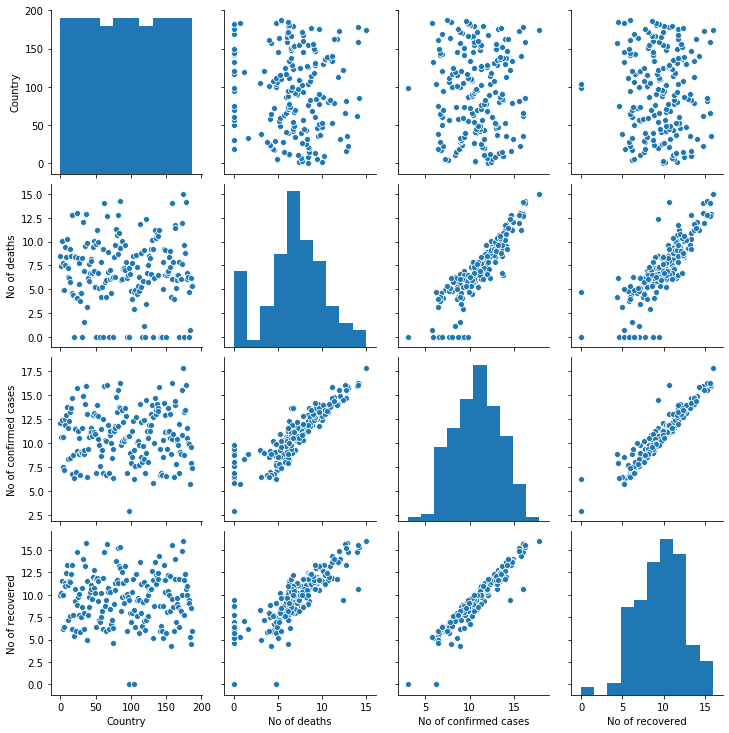

In [102]:
sns.pairplot(df_covid_new)

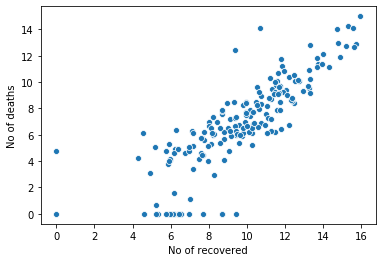

In [103]:
sns.scatterplot(x='No of recovered',y='No of deaths',data=df_covid_new)
plt.show()
#shows positive correlation

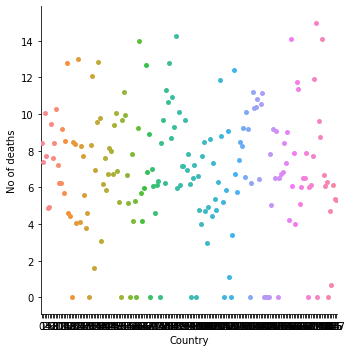

In [104]:
sns.catplot(x='Country',y='No of deaths',data=df_covid_new)
plt.show()
#shows positive correlation

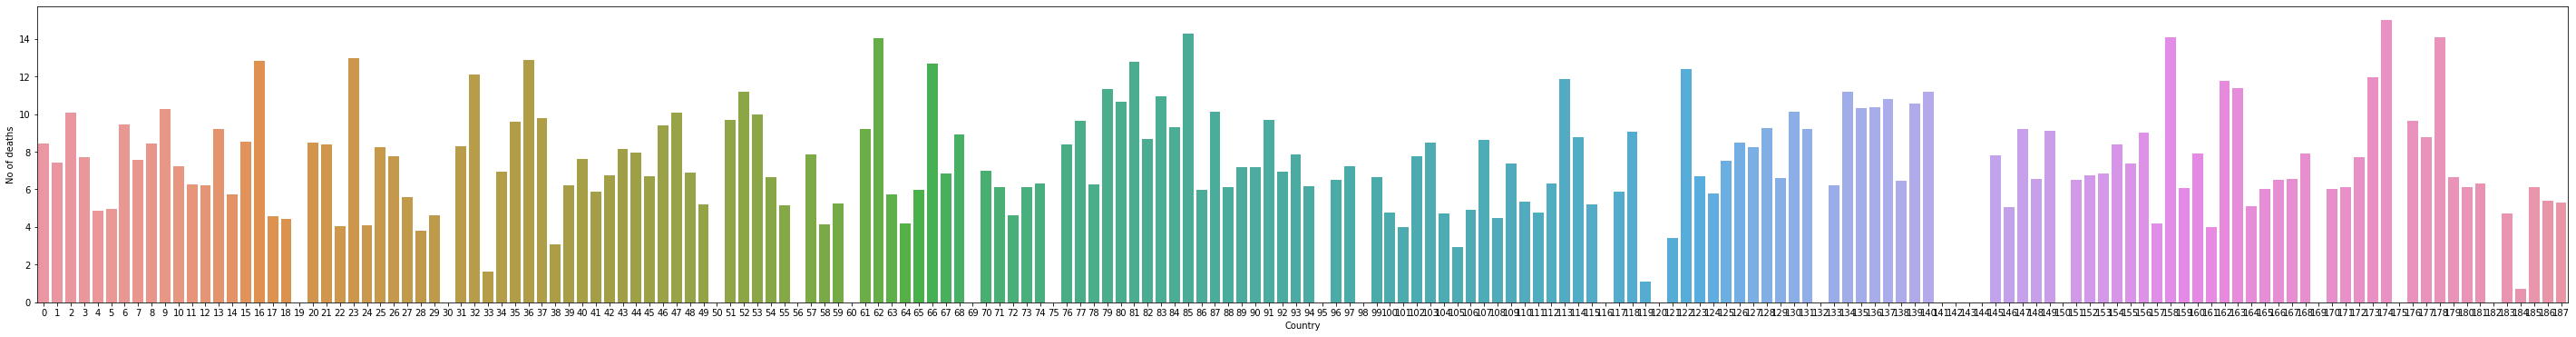

In [106]:
plt.figure(figsize=(50,6))
sns.barplot(x='Country',y='No of deaths',data=df_covid_new)
plt.show()

In [107]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_covid_new))
print(zscore)
print(np.where(zscore>3))
df_covid_final=df_covid_new[(zscore<3).all(axis=1)]

[[1.72286214e+00 4.74738756e-01 4.86573345e-01 1.14280839e-01]
 [1.70443581e+00 1.69994621e-01 7.87470754e-02 1.88629056e-01]
 [1.68600948e+00 9.39251078e-01 5.84175035e-01 6.97566941e-01]
 [1.66758315e+00 2.59435643e-01 7.58386222e-02 1.12672356e-01]
 [1.64915681e+00 5.57727013e-01 1.23867580e+00 1.20839568e+00]
 [1.63073048e+00 5.38630772e-01 1.37182437e+00 1.15323243e+00]
 [1.61230415e+00 7.62283412e-01 6.45490164e-01 5.99606450e-01]
 [1.59387781e+00 2.23814879e-01 4.05090463e-01 4.86483629e-01]
 [1.57545148e+00 4.68091450e-01 7.82026607e-01 1.00756358e+00]
 [1.55702515e+00 9.97870188e-01 1.08954845e+00 1.31876728e+00]
 [1.53859881e+00 1.26369475e-01 3.03144207e-01 5.25295533e-01]
 [1.52017248e+00 1.59674017e-01 9.47412732e-01 8.86096966e-01]
 [1.50174615e+00 1.72140660e-01 5.42180393e-01 6.64180570e-01]
 [1.48331981e+00 6.95303649e-01 9.21947454e-01 6.60450363e-01]
 [1.46489348e+00 3.15250010e-01 9.07424312e-01 7.04122849e-01]
 [1.44646715e+00 4.96698983e-01 1.05362419e+00 9.754996

In [108]:
print(df_covid_new.shape)
print(df_covid_final.shape)

(188, 4)
(186, 4)


In [110]:
#separating into input and output variables
df_x=df_covid_final.drop(columns=['No of deaths'])
y=pd.DataFrame(df_covid_final['No of deaths'])

In [111]:
#checking the shape
df_x.shape

(186, 3)

In [112]:
y.shape

(186, 1)

In [113]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [114]:
x.skew()

Country                  0.004429
No of confirmed cases    0.125003
No of recovered          0.121741
dtype: float64

In [115]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        cvs=cross_val_score(regr,x,y,cv=5,scoring='r2').mean()
        std=cross_val_score(regr,x,y,cv=5,scoring='r2').std()
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)
    print("Mean r2 score cross_val:",cross_val_score(regr,x,y,cv=5,scoring='r2').mean())
    print('Standard Deviation in r2 score cross_val:',cross_val_score(regr,x,y,cv=5,scoring='r2').std())
    return final_r_state

In [116]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.8256826224300324
r2 score corresponding to 43 is 0.8539026431756062
r2 score corresponding to 44 is 0.7709828768539717
r2 score corresponding to 45 is 0.6937286541006856
r2 score corresponding to 46 is 0.7594735697319995
r2 score corresponding to 47 is 0.833097584581865
r2 score corresponding to 48 is 0.7952596351978771
r2 score corresponding to 49 is 0.8745431330528988
r2 score corresponding to 50 is 0.8368643291268356
r2 score corresponding to 51 is 0.8861557786149509
r2 score corresponding to 52 is 0.8374598544160461
r2 score corresponding to 53 is 0.8468587185722529
r2 score corresponding to 54 is 0.7652703939313055
r2 score corresponding to 55 is 0.7738642991976614
r2 score corresponding to 56 is 0.7613385198169509
r2 score corresponding to 57 is 0.6778615314111789
r2 score corresponding to 58 is 0.8523463789200922
r2 score corresponding to 59 is 0.8216071688850576
r2 score corresponding to 60 is 0.8602676004001062
r2 score corresponding to 61 is 

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 7}

In [118]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=7)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.7395578681027462
r2 score corresponding to 43 is 0.780427481495449
r2 score corresponding to 44 is 0.6446520064316708
r2 score corresponding to 45 is 0.5492339187250923
r2 score corresponding to 46 is 0.6841666198105267
r2 score corresponding to 47 is 0.7344010474675505
r2 score corresponding to 48 is 0.7260462331152359
r2 score corresponding to 49 is 0.8620875759116575
r2 score corresponding to 50 is 0.7557212018883848
r2 score corresponding to 51 is 0.7949795091645617
r2 score corresponding to 52 is 0.771242613124303
r2 score corresponding to 53 is 0.721129672368534
r2 score corresponding to 54 is 0.6649816655386365
r2 score corresponding to 55 is 0.7599300090032817
r2 score corresponding to 56 is 0.6950133557616814
r2 score corresponding to 57 is 0.6195210659454709
r2 score corresponding to 58 is 0.794731421768037
r2 score corresponding to 59 is 0.6641471882167076
r2 score corresponding to 60 is 0.838448983302672
r2 score corresponding to 61 is 0.60

In [119]:
#Checking lasso Regression and finding best value for alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [120]:
#Checking max r2 score when we use Lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.8259106747213214
r2 score corresponding to 43 is 0.854169422548086
r2 score corresponding to 44 is 0.7708399589656397
r2 score corresponding to 45 is 0.6956813739136719
r2 score corresponding to 46 is 0.7596706977348098
r2 score corresponding to 47 is 0.8333904395810221
r2 score corresponding to 48 is 0.7955494823472962
r2 score corresponding to 49 is 0.8744968970420348
r2 score corresponding to 50 is 0.836724530437585
r2 score corresponding to 51 is 0.8860790169137683
r2 score corresponding to 52 is 0.8372804237598912
r2 score corresponding to 53 is 0.8465551418807403
r2 score corresponding to 54 is 0.7658430199061282
r2 score corresponding to 55 is 0.7741399033882492
r2 score corresponding to 56 is 0.7614439339072102
r2 score corresponding to 57 is 0.6783144811743208
r2 score corresponding to 58 is 0.8523974604630518
r2 score corresponding to 59 is 0.821615866451332
r2 score corresponding to 60 is 0.8605472926661886
r2 score corresponding to 61 is 0.

In [121]:
#Checking Ridge regression and finding best value for alpha
from sklearn.linear_model import Ridge
rdreg=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [123]:
#Checking max r2 score when we use Ridge
rdreg=Ridge(alpha=1)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.8260197687443216
r2 score corresponding to 43 is 0.8561887628913346
r2 score corresponding to 44 is 0.7690754203383212
r2 score corresponding to 45 is 0.7187670239137006
r2 score corresponding to 46 is 0.7618803911259826
r2 score corresponding to 47 is 0.8360367125075926
r2 score corresponding to 48 is 0.7971937623531685
r2 score corresponding to 49 is 0.8734440855711709
r2 score corresponding to 50 is 0.8348648266857366
r2 score corresponding to 51 is 0.8839378466473706
r2 score corresponding to 52 is 0.8352712474379722
r2 score corresponding to 53 is 0.8425811611684709
r2 score corresponding to 54 is 0.7709202156936994
r2 score corresponding to 55 is 0.7781271774624918
r2 score corresponding to 56 is 0.7633685448469428
r2 score corresponding to 57 is 0.683539388184858
r2 score corresponding to 58 is 0.8526742743281018
r2 score corresponding to 59 is 0.8200733231392642
r2 score corresponding to 60 is 0.8622788191624546
r2 score corresponding to 61 is 

In [124]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [125]:
#Using cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: 0.70961586820597
Standard Deviation in r2 score for Gradient Boosting Regression: 0.06356698751731153


In [126]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 1,
 'n_estimators': 500}

In [127]:
ada_reg=AdaBoostRegressor(base_estimator=lreg,learning_rate=1,n_estimators=500)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.7826910324304183
Standard Deviation in r2 score for Ada Boost Regression: 0.05649494015535422


In [128]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.8141182009546807
r2 score corresponding to 43 is 0.8166750452640774
r2 score corresponding to 44 is 0.7460526766826179
r2 score corresponding to 45 is 0.6947402991308947
r2 score corresponding to 46 is 0.7353411006486226
r2 score corresponding to 47 is 0.8199037508985656
r2 score corresponding to 48 is 0.7837875466430348
r2 score corresponding to 49 is 0.8650866187557559
r2 score corresponding to 50 is 0.8274835035352803
r2 score corresponding to 51 is 0.886960556051655
r2 score corresponding to 52 is 0.8510513384388141
r2 score corresponding to 53 is 0.8543180581810089
r2 score corresponding to 54 is 0.7485469081584666
r2 score corresponding to 55 is 0.732066718007881
r2 score corresponding to 56 is 0.7181142441794282
r2 score corresponding to 57 is 0.6742769159838031
r2 score corresponding to 58 is 0.872093400686404
r2 score corresponding to 59 is 0.8140413198692373
r2 score corresponding to 60 is 0.8271548984440817
r2 score corresponding to 61 is 0.

In [129]:
#We tried all methods and till now Linear Regression is the best

In [130]:
#Random state corresponding to highest r2 score is 69
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [131]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.9265409282828918
r2 score is: 0.9296517343098655


In [132]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(lreg,"covid_lreg.pkl")

['covid_lreg.pkl']